<a href="https://colab.research.google.com/github/mohantyld/Data-Science-Analysis-work/blob/main/handwrittenletters_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [5]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [14]:
len(X_train)

60000

In [9]:
X_test.shape

(10000, 28, 28)

In [11]:
y_test.shape

(10000,)

In [13]:
y_train.shape

(60000,)

In [16]:
X_train[0].shape

(28, 28)

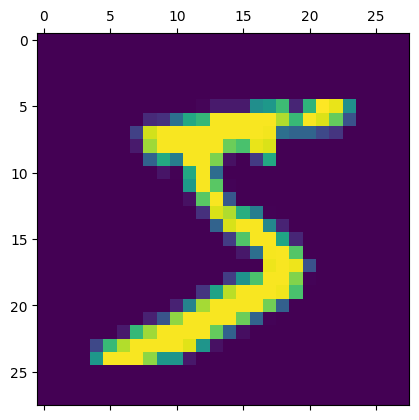

In [17]:
plt.matshow(X_train[0])

In [18]:
y_train[0]

5

In [22]:
X_train = X_train/255
X_test = X_test/255

In [24]:
X_train[0]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [26]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [27]:
X_train_flattened.shape

(60000, 784)

In [28]:
X_train_flattened[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [34]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1884 - accuracy: 0.5961
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9774 - accuracy: 0.7035
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7907 - accuracy: 0.7399
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6268 - accuracy: 0.7608
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4839 - accuracy: 0.7748


In [35]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 30.5525 - accuracy: 0.6906


[30.55254364013672, 0.6905999779701233]

In [54]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([7.2615607e-20, 0.0000000e+00, 0.0000000e+00, 1.7270828e-20,
       9.8413275e-30, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       4.3475423e-02, 1.0000000e+00], dtype=float32)

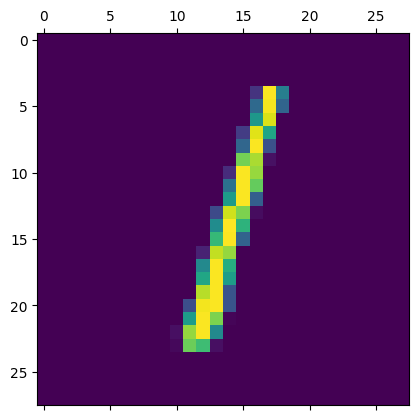

In [55]:
plt.matshow(X_test[2])

In [56]:
np.argmax(y_predicted[2])

1

In [57]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [58]:
y_predicted_labels[:5]

[7, 0, 1, 0, 0]

In [59]:
cm = tf.math.confusion_matrix(labels=y_test, predictions = y_predicted_labels)

In [60]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[974,   0,   2,   4,   0,   0,   0,   0,   0,   0],
       [  3, 915, 102,  61,   0,   0,  13,   0,  41,   0],
       [426,   0, 579,   4,   7,   0,   9,   4,   3,   0],
       [526,   0, 141, 327,   2,   0,   1,   8,   5,   0],
       [194,   0,  79,  48, 580,   0,  32,   3,  46,   0],
       [745,   1,  26,  35,   4,  28,   4,   3,  46,   0],
       [550,   2, 319,   8,   1,   1,  77,   0,   0,   0],
       [194,   5,  92,  90,  55,   0,   3, 567,  22,   0],
       [269,   0, 125, 256,   8,   4,  12,  11, 289,   0],
       [157,   1,  23,  88, 453,   2,   2, 118, 159,   6]], dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

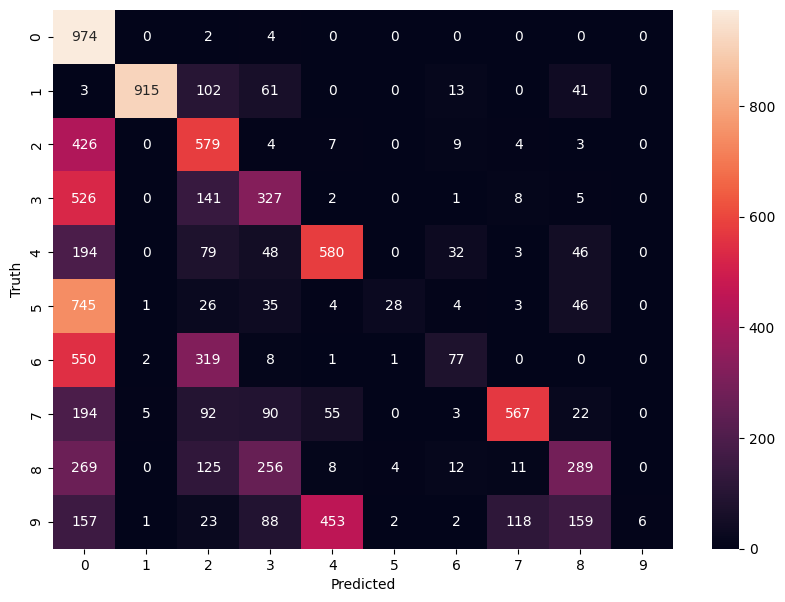

In [61]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [62]:
# Using Hidden Layer

In [64]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 2.0861 - accuracy: 0.3113
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5354 - accuracy: 0.4958
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2330 - accuracy: 0.5944
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0733 - accuracy: 0.6498
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9686 - accuracy: 0.6913


In [66]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 118.7772 - accuracy: 0.4967


[118.7771987915039, 0.4966999888420105]

313/313 [==============================] - 1s 3ms/step


Text(95.72222222222221, 0.5, 'Truth')

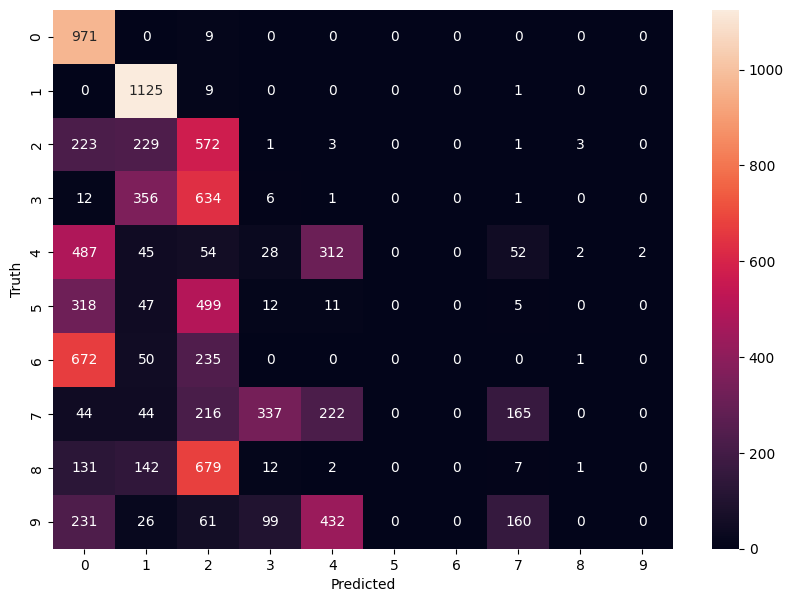

In [67]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [70]:
# Using Flatten layer so that we don't have to call .reshape on input dataset

In [71]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.2448 - accuracy: 0.7086
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5265 - accuracy: 0.8651
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4035 - accuracy: 0.8905
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3562 - accuracy: 0.9006
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3301 - accuracy: 0.9061
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3124 - accuracy: 0.9112
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2990 - accuracy: 0.9147
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2880 - accuracy: 0.9169
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2781 - accuracy: 0.9193
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.26

In [72]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 49.8302 - accuracy: 0.8442


[49.83022689819336, 0.8442000150680542]